# Principal Component Analysis with Cancer Data

In [336]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [337]:
data = pd.read_csv('breast-cancer-wisconsin-data.csv')
#data = data.dropna()
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [338]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [339]:
data.shape

(699, 11)

In [340]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [341]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


- Cell size, cell shape Marginal Adhesion, Bare Nuclei Bland Chromatin , class and Mitoses are having highly skews data

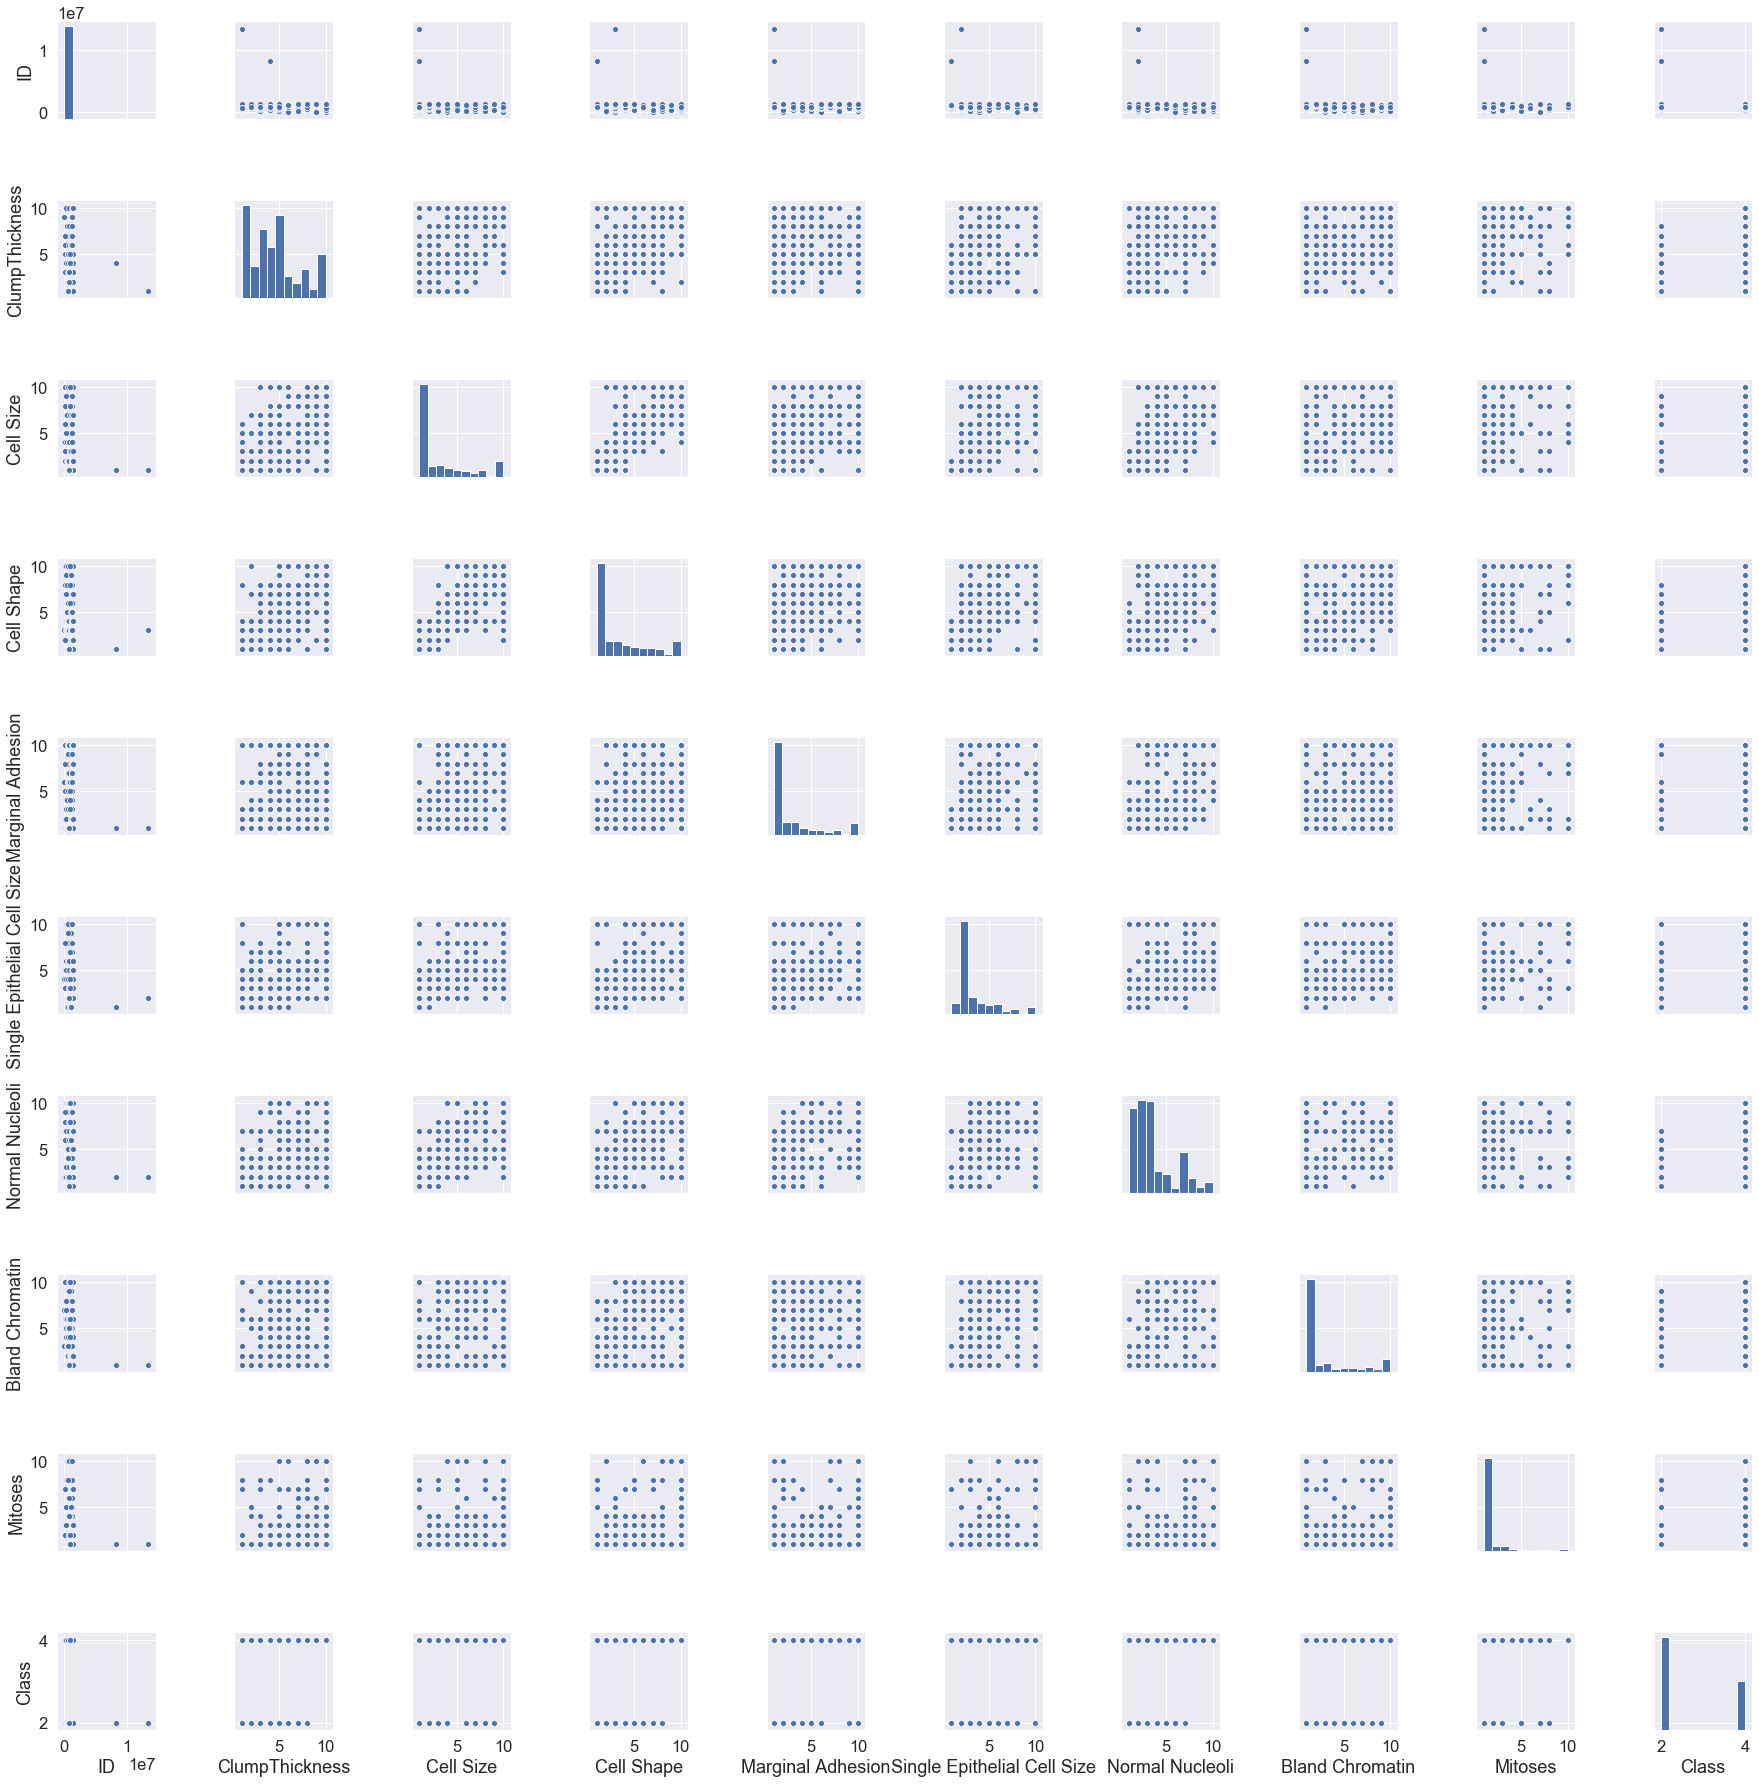

In [342]:
sns.set(font_scale=1.5)
sns.pairplot(data);

- None of the variables are correlated to each other

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [343]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
data.dtypes


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [344]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

- In 'Bare Nuclei' column there are '?' which should be removed

In [345]:
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [346]:
data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

- No missing value found in the columns

In [347]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data[data['Bare Nuclei'] == '?'].shape[0]

16

In [348]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

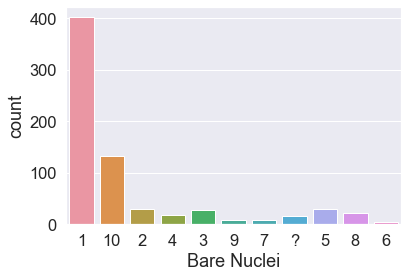

In [349]:
sns.countplot(x="Bare Nuclei", data=data)

- As count of 1 is more , we will replace ? with 1

In [350]:
data['Bare Nuclei'].replace('?', 1, inplace = True)

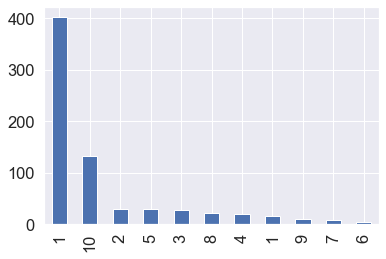

In [351]:
pd.value_counts(data['Bare Nuclei']).plot(kind='bar')

In [352]:
data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [353]:
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [354]:
data['Bare Nuclei']=data['Bare Nuclei'].astype(int)

In [355]:
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [356]:
data=data.drop_duplicates()


In [357]:
data.shape

(690, 11)

In [358]:
#data.drop_duplicates('ID', keep = 'first', inplace = True)


In [359]:
data[data.duplicated('ID')].count()

ID                             45
ClumpThickness                 45
Cell Size                      45
Cell Shape                     45
Marginal Adhesion              45
Single Epithelial Cell Size    45
Bare Nuclei                    45
Normal Nucleoli                45
Bland Chromatin                45
Mitoses                        45
Class                          45
dtype: int64

In [360]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,690.0,1.073826e+06,619609.221048,61634.0,874484.5,1171752.5,1238450.5,13454352.0
ClumpThickness,690.0,4.428986e+00,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333e+00,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348e+00,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536e+00,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043e+00,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609e+00,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232e+00,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507e+00,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203e+00,1.724230,1.0,1.0,1.0,1.0,10.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [361]:
# Check for correlation of variable
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


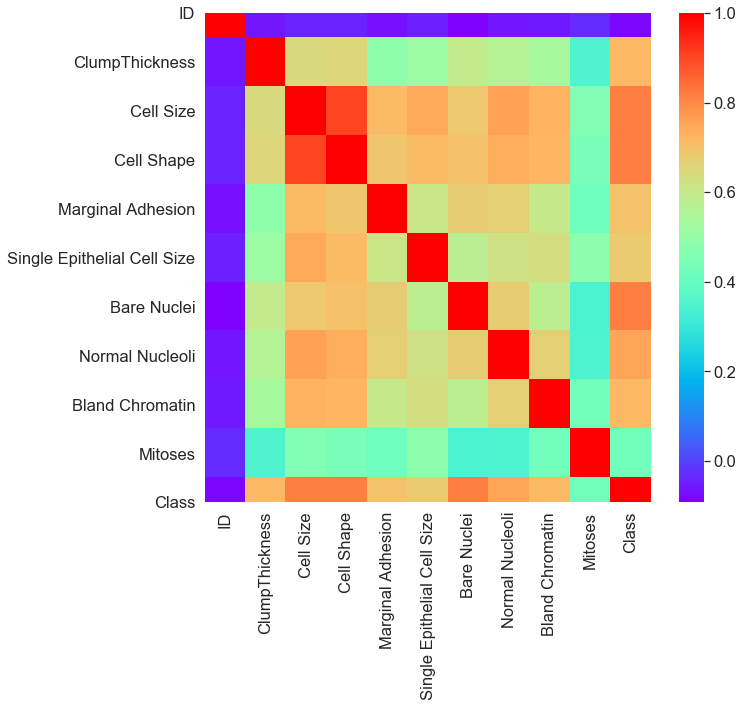

In [362]:
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(data.corr(), cmap='rainbow')

- Cell shape and cell size are highly correlated
- Cell size is correlated with Single Epithelial Cell Size, Bare Nuclei, Normal Nucleoli , marginal adhesion,and Bland Chromatin
- Target variable shows high correlation with most of these variables

In [363]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

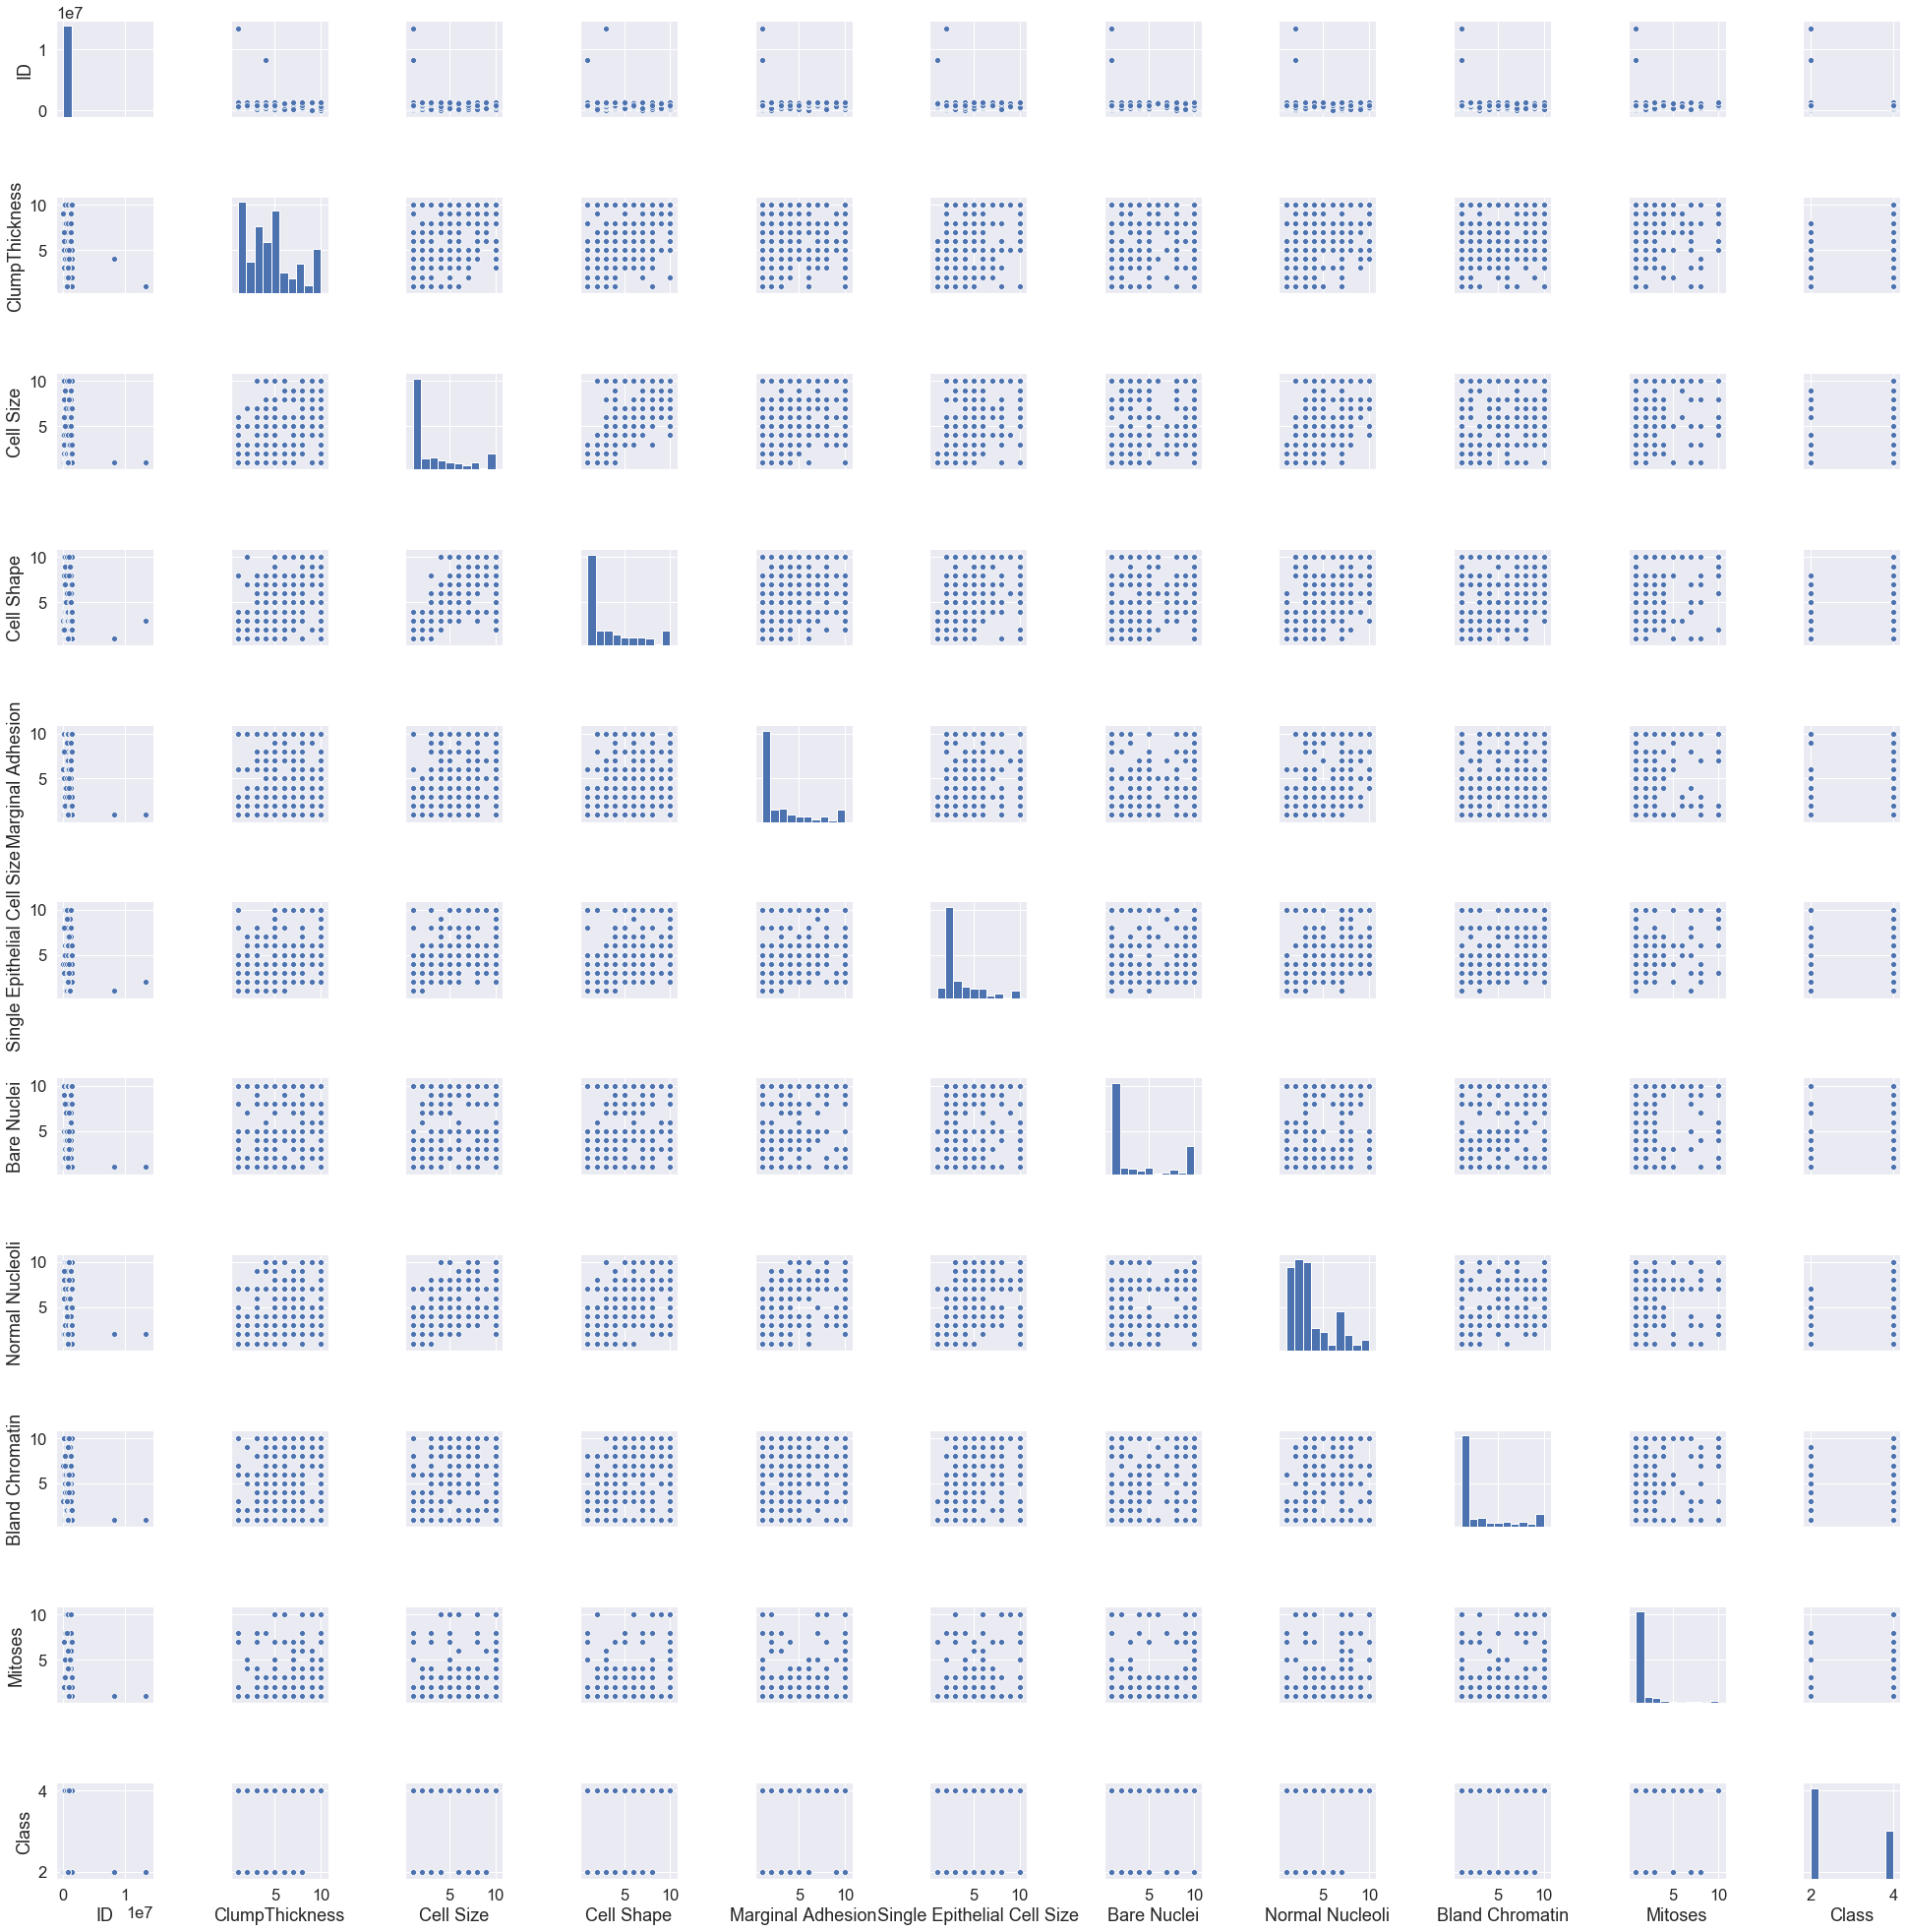

In [364]:
#Let us check for pair plots
sns.set(font_scale=1.5)
sns.pairplot(data);

- Relationship between variables shows come correlation. 
- Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
 Between 1 to 10

In [365]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [366]:
data.drop(["ID"], axis = 1, inplace = True)

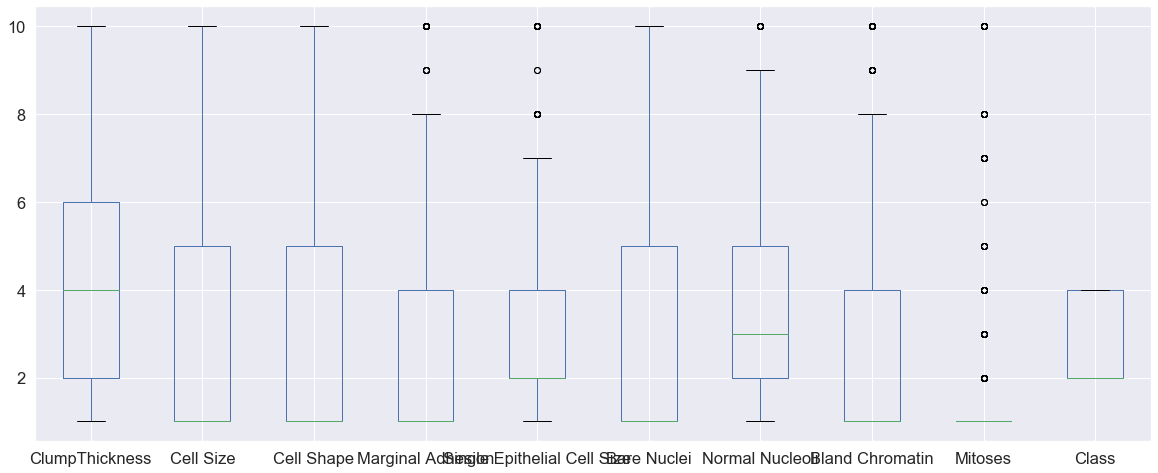

In [367]:
data.boxplot(figsize=(20,8))

In [368]:
pd.crosstab((data["Marginal Adhesion"]),data["Class"])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [369]:
data['Marginal Adhesion']= np.where(data['Marginal Adhesion']>7,7,data['Marginal Adhesion'])

In [370]:
pd.crosstab((data["Marginal Adhesion"]),data["Class"])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,2,96


In [371]:
pd.crosstab((data["Single Epithelial Cell Size"]),data["Class"])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [372]:
data['Single Epithelial Cell Size']= np.where(data['Single Epithelial Cell Size']>8,8,data['Single Epithelial Cell Size'])

In [373]:
pd.crosstab((data["Single Epithelial Cell Size"]),data["Class"])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,3,49


In [374]:
pd.crosstab((data["Normal Nucleoli"]),data["Class"])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [375]:
data['Normal Nucleoli']= np.where(data['Normal Nucleoli']>8,8,data['Normal Nucleoli'])

In [376]:
pd.crosstab((data["Normal Nucleoli"]),data["Class"])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,59


In [377]:
pd.crosstab((data["Bland Chromatin"]),data["Class"])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [378]:
data['Bland Chromatin']= np.where(data['Bland Chromatin']>8,8,data['Bland Chromatin'])

In [379]:
pd.crosstab((data["Bland Chromatin"]),data["Class"])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,5,96


In [380]:
pd.crosstab((data["Mitoses"]),data["Class"])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [381]:
data['Mitoses']= np.where(data['Mitoses']>8,8,data['Mitoses'])

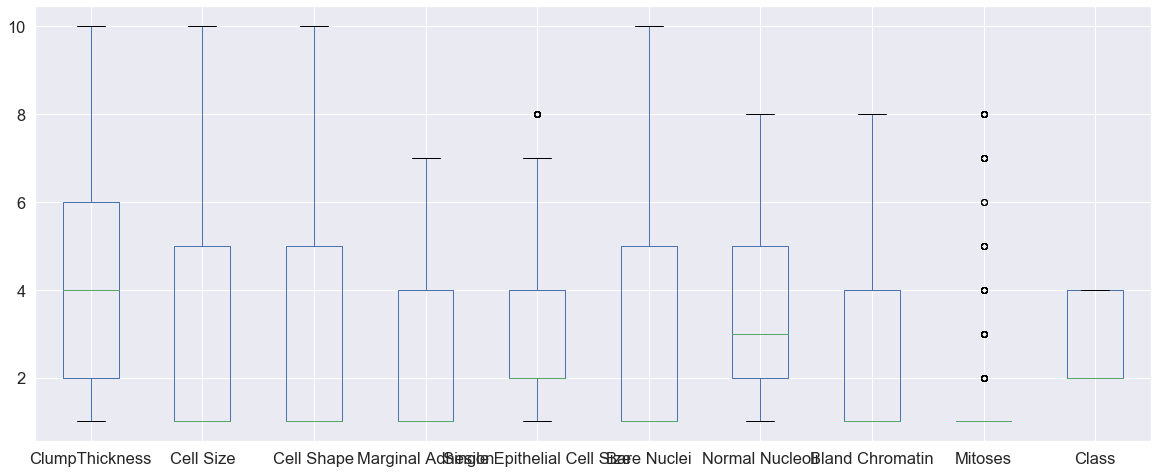

In [382]:
data.boxplot(figsize=(20,8))

In [383]:
data.shape

(690, 10)

# Q6 Create a covariance matrix for identifying Principal components

In [384]:
from sklearn.preprocessing import StandardScaler
X = data.drop(['Class'], axis = 1)
y = data['Class']
scaler = StandardScaler()
X_sd = scaler.fit_transform(X)

In [385]:
# PCA
# Step 1 - Create covariance matrix
# Get eigen value and eigen vector from the variance covariance matriz
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)


Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.51789441 0.53358417 0.59150555
  0.57406936 0.54895554 0.35664823]
 [0.64410677 1.00145138 0.9066632  0.73867875 0.76944771 0.68556472
  0.75829256 0.7322064  0.46804598]
 [0.65453792 0.9066632  1.00145138 0.7129932  0.73850106 0.70518656
  0.73948297 0.72768806 0.45060854]
 [0.51789441 0.73867875 0.7129932  1.00145138 0.65185392 0.69720674
  0.69697229 0.64080341 0.40835468]
 [0.53358417 0.76944771 0.73850106 0.65185392 1.00145138 0.60892184
  0.64557983 0.67156168 0.47240792]
 [0.59150555 0.68556472 0.70518656 0.69720674 0.60892184 1.00145138
  0.68571135 0.60106392 0.36251511]
 [0.57406936 0.75829256 0.73948297 0.69697229 0.64557983 0.68571135
  1.00145138 0.68339973 0.35939166]
 [0.54895554 0.7322064  0.72768806 0.64080341 0.67156168 0.60106392
  0.68339973 1.00145138 0.4307497 ]
 [0.35664823 0.46804598 0.45060854 0.40835468 0.47240792 0.36251511
  0.35939166 0.4307497  1.00145138]]
Eigenvectors 
[[-3.00677185e-01  1.198442

# Q7 Identify eigen values and eigen vector

In [386]:
# Step 2- Get eigen values and eigen vector

In [387]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-3.00677185e-01  1.19844256e-01 -8.88206969e-01 -2.67741141e-03
   8.43116072e-02 -2.35800669e-01  2.08807694e-01 -5.20353958e-04
  -6.85622406e-04]
 [-3.77027036e-01  3.59402804e-02  5.56411067e-02 -7.39124120e-01
   2.13644318e-01  3.62166939e-01 -1.21262891e-02  2.03876183e-01
   2.97719972e-01]
 [-3.73374040e-01  6.39358434e-02 -6.98699342e-03  6.59395897e-01
   1.92226931e-01  5.41800862e-01 -6.01660507e-02  1.76646144e-01
   2.37337493e-01]
 [-3.40139338e-01  9.87027020e-02  3.06852839e-01  6.37166868e-02
  -4.28826269e-01 -1.86407352e-01  7.23030812e-01  7.32548965e-02
   1.71944820e-01]
 [-3.40793833e-01 -1.10359595e-01  2.26037694e-01  7.06394202e-02
   3.44113621e-01 -4.74998695e-01 -1.40065646e-01  5.72676781e-01
  -3.52111249e-01]
 [-3.32572446e-01  2.12971927e-01 -6.07217317e-02 -7.95052134e-02
  -6.23101173e-01  2.37741907e-01 -3.41966720e-01  4.52269886e-02
  -5.19872403e-01]
 [-3.45648146e-01  2.15131482e-01  1.38612148e-01  5.46689318e-02
  -8.40527973e

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 66.72525541  75.12013957  80.98545517  85.87729893  89.7172639
  92.99857496  96.12855172  98.99995719 100.        ]


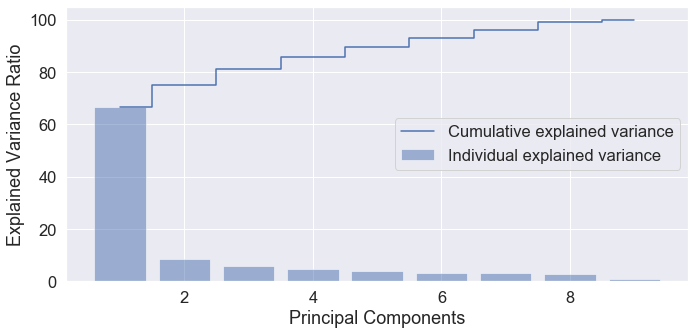

In [388]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [389]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.49586868,  1.69918438, -1.61745607, ...,  3.92933332,
         2.21015393,  2.62614323],
       [-0.10587112, -0.62818983, -0.07965688, ..., -0.17931026,
        -0.96753564, -1.06304286],
       [-0.61877044,  0.47877243, -0.00459258, ...,  1.06758894,
         0.93657083,  1.03423821],
       [ 0.0831052 , -0.79783151, -0.14918141, ...,  2.20371435,
         0.53518369,  0.16806208],
       [-0.16222397,  1.68032349, -0.14934146, ..., -0.11513601,
        -1.04160423, -0.07701817]])

C:\Users\yf9852\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


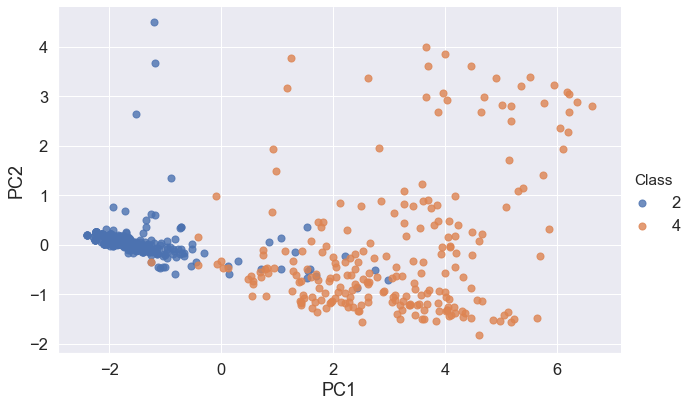

In [390]:
## Plot of PC1 and PC2
data["PC1"] = data_reduced[:,0]
data["PC2"] = data_reduced[:,1]
data["PC3"] = data_reduced[:,2]
data["PC4"] = data_reduced[:,3]
data["PC5"] = data_reduced[:,4]
vis = sns.lmplot(data = data[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

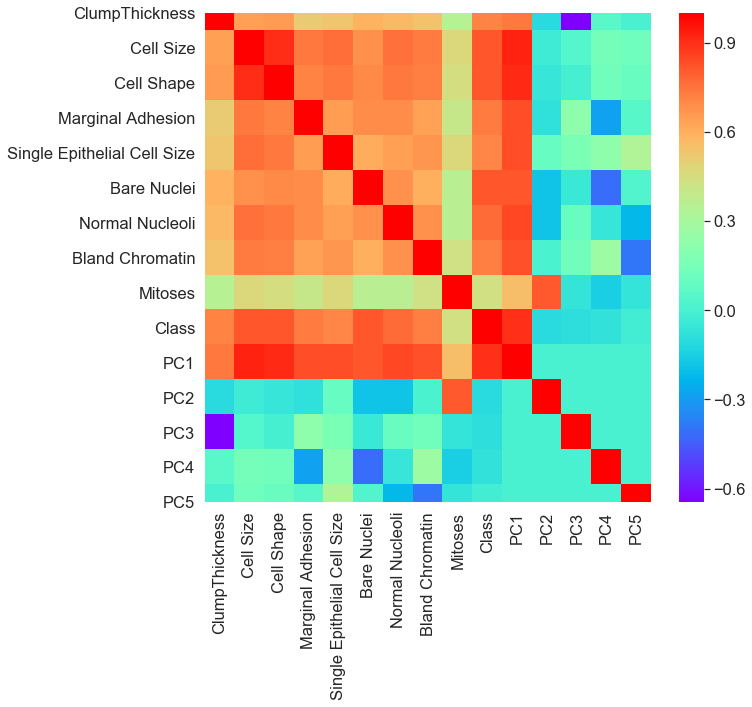

In [391]:
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(data.corr(), cmap='rainbow')

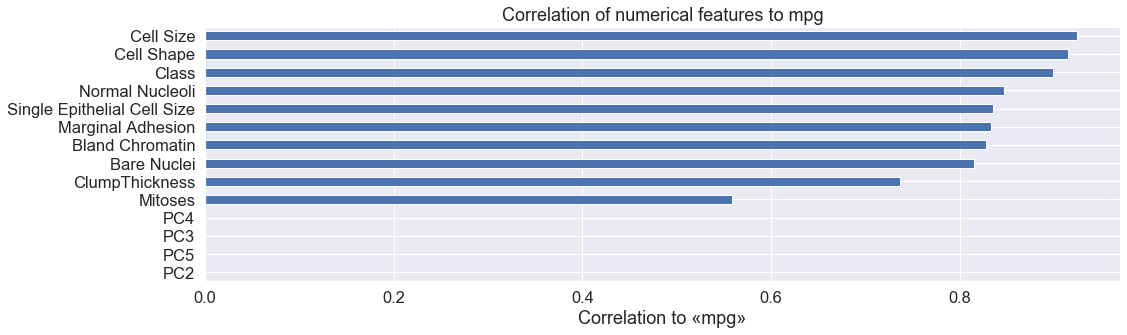

In [392]:
sns.set(font_scale=1.5)
mat_corr=data.corr()
plt.figure(figsize=(16,5))
mat_corr["PC1"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to mpg")
plt.xlabel("Correlation to «mpg»")
plt.tight_layout()
plt.show()

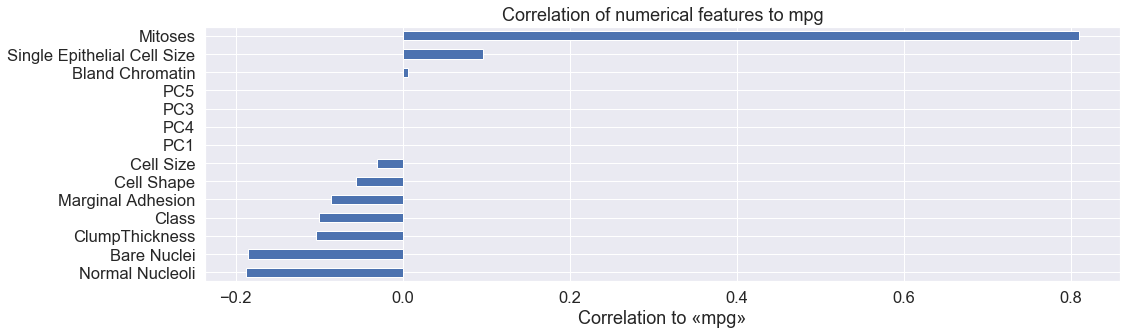

In [393]:
sns.set(font_scale=1.5)
mat_corr=data.corr()
plt.figure(figsize=(16,5))
mat_corr["PC2"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to mpg")
plt.xlabel("Correlation to «mpg»")
plt.tight_layout()
plt.show()

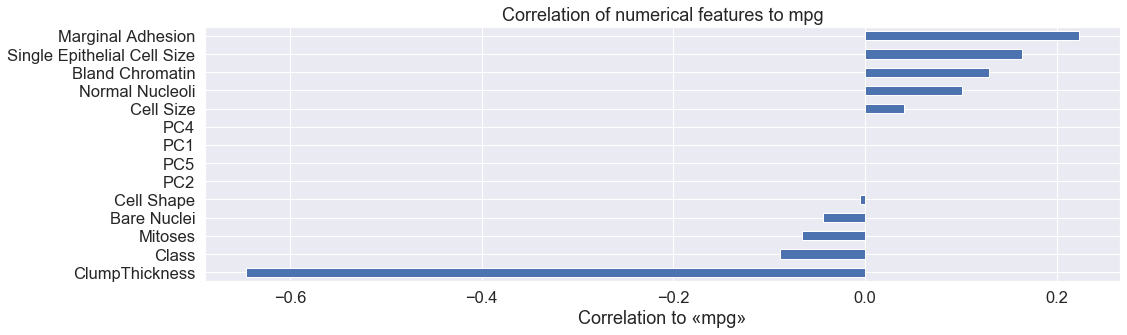

In [394]:
sns.set(font_scale=1.5)
mat_corr=data.corr()
plt.figure(figsize=(16,5))
mat_corr["PC3"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to mpg")
plt.xlabel("Correlation to «mpg»")
plt.tight_layout()
plt.show()

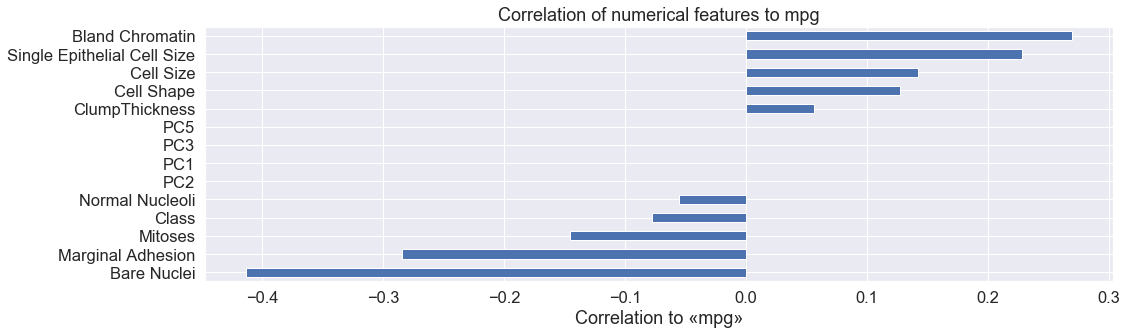

In [395]:
sns.set(font_scale=1.5)
mat_corr=data.corr()
plt.figure(figsize=(16,5))
mat_corr["PC4"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to mpg")
plt.xlabel("Correlation to «mpg»")
plt.tight_layout()
plt.show()

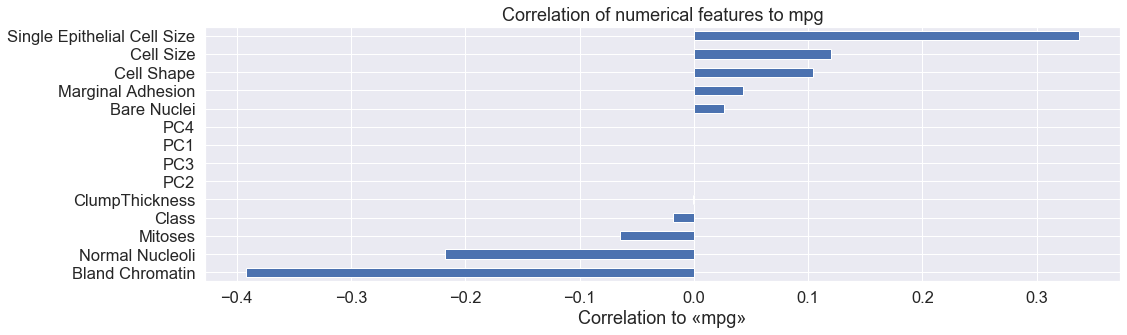

In [396]:
sns.set(font_scale=1.5)
mat_corr=data.corr()
plt.figure(figsize=(16,5))
mat_corr["PC5"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to mpg")
plt.xlabel("Correlation to «mpg»")
plt.tight_layout()
plt.show()

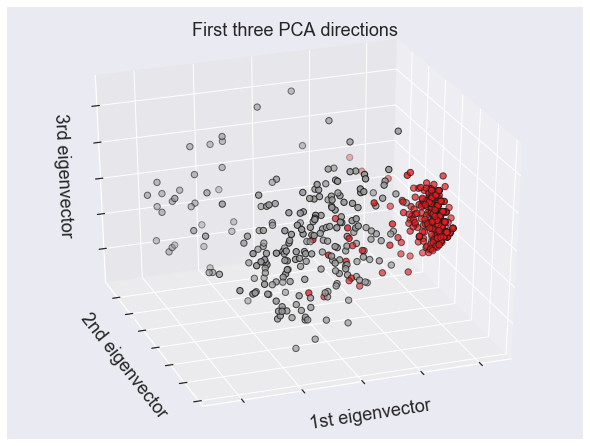

In [397]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=5).fit_transform(X_sd)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [398]:
data1 = pd.read_csv('jokes.csv')

In [399]:
data1.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [400]:
ratings=data1.iloc[:200,1:]

In [401]:
ratings.shape

(200, 100)

In [402]:
ratings.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [403]:
ratings.columns=np.arange(100).tolist()

In [404]:
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [405]:
ratings.replace(99, 0, inplace = True)

In [406]:
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [407]:
scaler = StandardScaler()
ratings_diff = scaler.fit_transform(ratings.T)

In [408]:
ratings_diff.shape

(100, 200)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [409]:
mean=ratings_diff.mean(axis = 1)

In [410]:
ratings=ratings.T

In [411]:
ratings['Mean']=mean

In [412]:
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Mean
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58,-0.007507
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28,-0.045999
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56,-0.107076
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67,-0.329460
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38,-0.177909


In [413]:
ratings.sort_values("Mean", ascending = False , inplace=True)

In [414]:
ratings.head(10).index

Int64Index([49, 35, 52, 34, 28, 26, 61, 48, 31, 30], dtype='int64')